# House Price Predict
### preprocessing 
##### 1. dataset 확인
* 변수확인 : 독립/ 종속 변수의 정의 , 각 feature의 유형(연속형, 범주형) , 변수의 데이터 타입 확인 (int, float, string 등..)
* raw 데이터 확인 : 각 feature 의 평균 , 최빈값, 중간값 등 feature 들의 분포를 확인
* 분석 : 상관관계를 파악. 

##### 2. 결측값 처리
* 삭제 : 모델의 적합성이 낮아질 수 있음
* 다른값으로 대체 : 두개의 value를 합치거나 새로운 value를 선언
* 예측값 삽입 : 연관성이 있는 feature 와 logistic regression 또는 linear regression 등 모델 이용하여 결측값을 예측

##### 3. 이상치 처리
* 모든 데이터가 정확히 기입된다는 보장 x 
* 이상치의 처리가 중요한 이유는 이상치가 포함이 될 경우 최적화된 weight를 찾을 수 없음 , 단 오버피팅 될 수 있음
* 이상치의 처리는 종속변수와 feature 의 관계를 시각화하여 제거

##### 4. Feature Engineering
* scaling : Min-Max , StandardScaler(정규 분포) , log, square root 등을 사용
* one- hot encoding : 범주형 -> 연속형 변환


In [8]:
#모듈 불어오기
import pandas as pd
import matplotlib.pyplot as plt
#Seaborn은 matplotlib를 기반으로 하는 데이터 시각화 라이브러리
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,normalize
from sklearn import preprocessing
#경고 메세지 없애기
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [34]:
# train 파일 불러오기
df = pd.read_csv('train.csv')

##### csv 파일을 불러오고 나서 dataset 확인하기!!

In [37]:
#상위 5개 row 확인
# 하위 5개 확인 방법 df.tail()
df.head()   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
# 최빈값, 평균 확인방법
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [59]:
#feature 유형 파악하는 법
df.select_dtypes(include=['object']).columns.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype=object)

In [60]:
#상관관계 파악하는 법 
#상관관계는 -1 ~ 1 의 값. 1에 가까울수록 양의 비례관계 ,  -1에 가까울수록 반비례관계
# data cleaning 에 이용
correlation = df.corr().SalePrice.sort_values(ascending=False)
correlation.head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

In [61]:
#결측 데이터가 많은 column 순으로 데이터 확인
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageYrBlt,81,0.055479


## 결측치가 많은 순서대로 Data 정제
* 연속형 X 범주형  =>  boxplot
* 연속형 X 연속형  =>  scatter ( 산점도 ) 

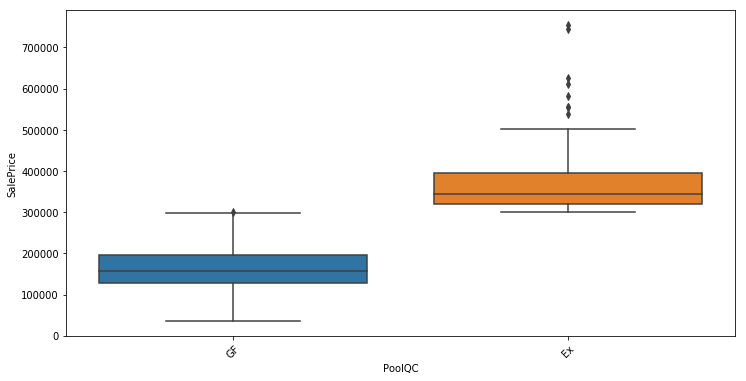

In [62]:
plt.figure(figsize = (12, 6))  #이미지 크기 지정
sns.boxplot(x = 'PoolQC', y = 'SalePrice',  data = df)  # boxplot 그래프 그리기
xt = plt.xticks(rotation=45) # x축 value 기울기 딱히 필요없음

null 값이 가장 많은 PoolQC 의 경우 Pool 이 Ex일 때 sale price 가 높다.

결측치는 sale price가 300000 이상일 때  Ex   , 300000 미만일 때  GF 으로 변경

In [66]:
#데이터 replace
df['PoolQC'] = df['PoolQC'].replace('Fa','GF')
df['PoolQC'] = df['PoolQC'].replace('Gd','GF')

# SalePrice 가 300000 이상인 loacation 의 PoolQC 를 Ex 로 바꿔라.
df.loc[df.SalePrice >= 300000,'PoolQC'] = 'Ex'
df.loc[df.SalePrice < 300000,'PoolQC'] = 'GF'

#결측치가 채워졌는지 확인
df['PoolQC'].isnull().sum()

0

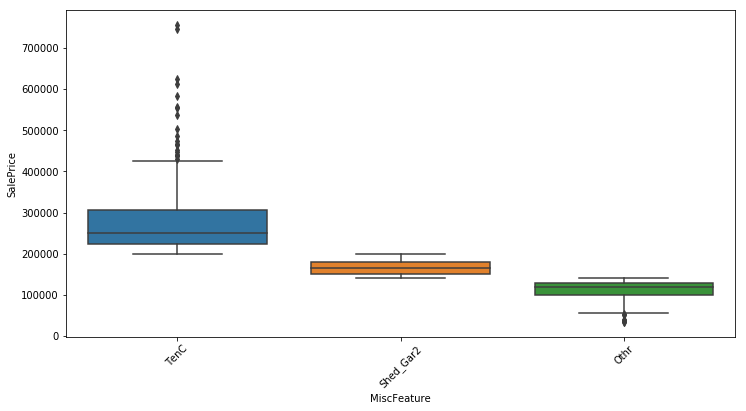

In [67]:
#MiscFeature handling
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'MiscFeature', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)

MiscFeature 가 TenC 일 때 sale price 가 높다. 

Shed,Gar2 는 묶어서 Shed_Gar2 로 바꾸어 주고 결측치는 가격이 250000 일 때 TenC , 140000 이하일 때 Othr , 그 사이일 때 Shed_Gar2

In [68]:
df.loc[df.SalePrice >= 200000,'MiscFeature'] = 'TenC'

df.loc[df.SalePrice < 200000 ,'MiscFeature'] =  'Shed_Gar2'

df.loc[df.SalePrice < 140000,'MiscFeature'] = 'Othr'
df.MiscFeature.isnull().sum()

0

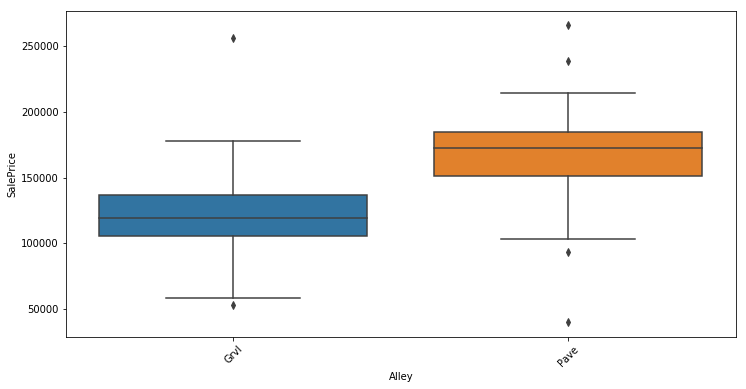

In [69]:
#Alley handling

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Alley', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)


>sale price 150000 이상이면 Pave , else Grvl 로 missing data 채워줌

In [70]:
df.loc[df.SalePrice >= 150000,'Alley'] = 'Pave'

df.loc[df.SalePrice < 150000 ,'Alley'] =  'Grvl'

df.Alley.isnull().sum()

0

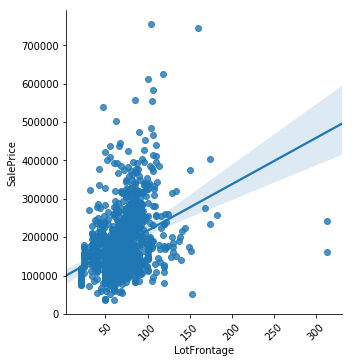

In [73]:
#LotFrontage handling

plt.figure(figsize = (12, 6))
sns.lmplot(x = 'LotFrontage', y = 'SalePrice',  data = df)
xt = plt.xticks(rotation=45)


LotFrontage 와 가격의 관계를 파악하기 힘들다. 

따라서 LotFrontage 와 상관관계가 가장 높은 column 을 찾아서 결측치를 채운다.

In [75]:
cols = corrmat.nlargest(40, 'LotFrontage')['LotFrontage'].index  #nlargest 는 메트릭스 형태 
print(cols)

Index(['LotFrontage', '1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'SalePrice', 'GarageArea', 'GarageCars', 'Fireplaces',
       'BedroomAbvGr', 'OverallQual', 'BsmtFinSF1', 'PoolArea', 'FullBath',
       'MasVnrArea', 'OpenPorchSF', 'BsmtUnfSF', 'YearBuilt', 'BsmtFullBath',
       'YearRemodAdd', 'WoodDeckSF', '2ndFlrSF', 'GarageYrBlt', '3SsnPorch',
       'HalfBath', 'BsmtFinSF2', 'ScreenPorch', 'LowQualFinSF', 'MoSold',
       'EnclosedPorch', 'YrSold', 'MiscVal', 'KitchenAbvGr', 'BsmtHalfBath',
       'Id', 'OverallCond', 'MSSubClass'],
      dtype='object')


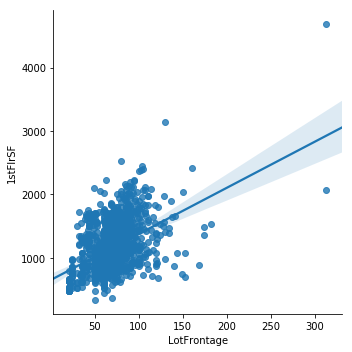

In [76]:
#LotFrontage 와 상관관계가 가장 높은 column 은 1stFlrSF
sns.lmplot(x = 'LotFrontage', y = '1stFlrSF',  data = df)

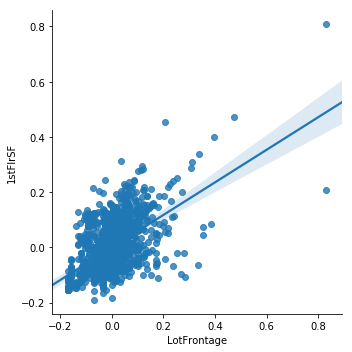

In [80]:
# 두 column 의 scale을 맞춰주고 결측치를 채운다. Min-Max 이용
df['1stFlrSF'] = (df['1stFlrSF'] - df['1stFlrSF'].mean()) / (df['1stFlrSF'].max() - df['1stFlrSF'].min())
df['LotFrontage'] = (df['LotFrontage'] - df['LotFrontage'].mean()) / (df['LotFrontage'].max() - df['LotFrontage'].min())

# LotFrontage의 결측치를 1stFlrSF 로 채워준다.
df['LotFrontage'] = df['LotFrontage'] .fillna(df['1stFlrSF'])

sns.lmplot(x = 'LotFrontage', y = '1stFlrSF',  data = df)

#### 다음 결측치

GarageType	   81	0.055479<br /> 
GarageQual	   81	0.055479<br /> 
GarageCond	  81	0.055479<br /> 
GarageFinish   81	0.055479<br /> 
GarageYrBlt	    81	0.055479<br /> 

In [81]:
#Garage에 대한 null 값은 집에 garage가 없는 경우
#GarageCond  -범주형
#GarageType  - 범주형
#GarageYrBlt  -연속형
#GarageFinish - 범주형
#GarageQual   -범주형
#이 5가지 column이 한 set로 묶인다. 결측치를 새로운 value로 채운다.

df['GarageCond'] = df['GarageCond'].fillna('No')
df['GarageType'] = df['GarageType'].fillna('No')
df['GarageFinish'] = df['GarageFinish'].fillna('No')
df['GarageQual'] = df['GarageQual'].fillna('No')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [82]:
#BsmtExposure
#BsmtFinType2
#BsmtFinType1
#BsmtCond
#BsmtQual
#이 5가지 column이 한 set로 묶인다. 결측치를 새로운 value로 채운다.
df['BsmtExposure'] = df['BsmtExposure'].fillna('dont')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('dont')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('dont')
df['BsmtCond'] = df['BsmtCond'].fillna('dont')
df['BsmtQual'] = df['BsmtQual'].fillna('dont')



In [83]:
# Fence 의 경우 price와 상관관계가 적고 결측치가 90% 를 넘기 때문에 drop 시킴
# FireplaceQu 의 경우 Fireplace 으로 설명되어 질 수 있기 때문에 drop 시킴
df = df.drop(['Fence','Id','FireplaceQu'],axis=1)

In [86]:
# 나머지 몇개 안되는 결측치 drop 시킴
df = df.dropna()

#### 이상치 제거
* 그래프 시각화
* 상관관계 높은 순서대로 진행

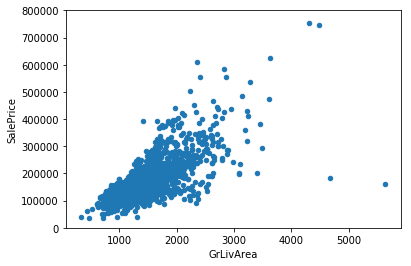

In [92]:
#시각화
# OverallQual
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)

#이상치 파악
#data[data['GrLivArea'] > 4000].sort_values(['SalePrice'])

#ylim 은 y 축 
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [93]:
#이상치 제거
df = df.drop([523])
df = df.drop([1298])
df = df.drop([457])
df = df.drop([1182])
df = df.drop([691])
df = df.drop([185])
df = df.drop([1250])
df = df.drop([1373])
df = df.drop([1044])
df =df.drop([332])
df=df.drop([496])
df=df.drop([53])


In [99]:
#one-hot encoding
df = pd.get_dummies(df)

In [95]:
#scaling Min-Max (0,5)

y_data = df['SalePrice']
min_max_scaler_y = preprocessing.MinMaxScaler(feature_range=(0,5))
y_data = min_max_scaler_y.fit_transform(y_data)


x_data = df.drop(['SalePrice'],axis=1)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,5))
x_data = min_max_scaler.fit_transform(x_data)


In [96]:
print(y_data) 
print(x_data) 

[ 1.47093713  1.24216235  1.59803423 ...,  1.96237926  0.90853245
  0.95407558]
[[ 1.17647059  0.75342466  0.16709902 ...,  0.          5.          0.        ]
 [ 0.          1.01027397  0.19397509 ...,  0.          5.          0.        ]
 [ 1.17647059  0.80479452  0.2325364  ...,  0.          5.          0.        ]
 ..., 
 [ 1.47058824  0.77054795  0.18093435 ...,  0.          5.          0.        ]
 [ 0.          0.80479452  0.19670943 ...,  0.          5.          0.        ]
 [ 0.          0.92465753  0.20185094 ...,  0.          5.          0.        ]]


In [97]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

#### model 설정
* LinearRegression 의 경우 R : 95.3
* RANSAC 의 경우 R : 95.7

#### Multilayer Perceptron Regression
* 4 개의 은닉층
* input size = [ 1439 , 250 ] 
* hidden_layer_W1 = [250 , 700 ]
* hidden_layer_W2 = [700, 1000 ]
* hidden_layer_W3 = [1000, 600 ]
* hidden_layer_W4 = [600, 1] 
* x_data -> X*W1 = layer_1 -> relu(layer_1) -> layer_1 * W2  = layer_2 이런식

In [32]:
# MLPRegression
# R 값을 올리는 것에 중점을 두어서 오버피팅 문제는 생략하였습니다..

regr =MLPRegressor(
    hidden_layer_sizes=(250,700,1000,600),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.00025, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
regr.fit(x_data,y_data)

y_true = y_data
y_pred = regr.predict(x_data)

RMSE = (mean_squared_error(y_true, y_pred))**0.5
MSE = mean_squared_error(y_true, y_pred)
MAE = mean_absolute_error(y_true,y_pred)

R = r2_score(y_true, y_pred)  
print('MAE : ' , MAE , '\nMSE :',MSE, '\nRMSE : ',RMSE , '\nR :',R)
       

MAE :  0.0195674904751 
MSE : 0.0007460627266 
RMSE :  0.0273141488354 
R : 0.998168722171
